In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(train.shape, test.shape)

(2838, 370) (939, 369)


In [3]:
# Задача:

# Определить сельскохозяйственную культуру по ежедневным значениям
# нормализованного индекса вегетации.

In [4]:
# **Описание данных**

# Данные собраны по 17 регионам РФ преимущественно Европейской части России.
# Каждая культура задаётся набором полей:

# - Year – год
# - Field ID – поле, на котором растёт культура
# - Culture – вид культуры
# - Field Area – площадь поля, занимаемая данной культурой
# - Day i – нормализованный индекс вегетативности в i-ый день

In [5]:
train.head(2)

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
0,2018,517,48.64,0.5369,0.5371,0.5375,0.5379,0.5384,0.5390,0.5397,...,0.4362,0.4322,0.4283,0.4243,0.4203,0.4163,0.4123,0.4084,NaN,4
1,2019,1395,80.41,0.1159,0.1096,0.1034,0.0971,0.0909,0.0846,0.0783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [6]:
test.head(2)

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2019,605,132.60,-0.0047,-0.0051,-0.0056,-0.0061,-0.0067,-0.0073,-0.0080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,305,61.44,0.2445,0.2438,0.2431,0.2424,0.2417,0.2410,0.2403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
X_train = train.drop('Culture', axis=1)
y_train = train['Culture']

X_test = test.copy()

In [8]:
# Data Analysis

In [9]:
X_train['Year'].value_counts()

2018    925
2017    643
2019    476
2016    447
2015    347
Name: Year, dtype: int64

In [10]:
X_test['Year'].value_counts()

2019    934
2018      3
2017      1
2015      1
Name: Year, dtype: int64

In [11]:
X_tt, X_tv, y_tt, y_tv = X_train[X_train.Year < 2019], X_train[X_train.Year == 2019],  \
                            y_train[X_train.Year < 2019], y_train[X_train.Year == 2019]
print(len(X_tt), len(X_tv))
imputer = KNNImputer(n_neighbors=9, weights="distance")
X_tt = imputer.fit_transform(X_tt)
X_tv = imputer.transform(X_tv)
model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=15, 
                               max_features = 'sqrt')
model.fit(X_tt, y_tt)
preds_valid = model.predict(X_tv)
print(f1_score(y_tv, preds_valid, average='weighted'))

2362 476
0.4191514304368203


In [12]:
X_tt, X_tv, y_tt, y_tv = X_train[X_train.Year == 2018], X_train[X_train.Year == 2019],  \
                            y_train[X_train.Year == 2018], y_train[X_train.Year == 2019]
print(len(X_tt), len(X_tv))
imputer = KNNImputer(n_neighbors=9, weights="distance")
X_tt = imputer.fit_transform(X_tt)
X_tv = imputer.transform(X_tv)
model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=15,
                               max_features = 'sqrt')
model.fit(X_tt, y_tt)
preds_valid = model.predict(X_tv)
print(f1_score(y_tv, preds_valid, average='weighted'))

925 476
0.42831390971923783


In [13]:
X_tt, X_tv, y_tt, y_tv = train_test_split(X_train[X_train.Year == 2019]. \
                                                              drop('Year', axis = 1), 
                                                  y_train[X_train.Year == 2019], 
                                                  test_size = 0.2, 
                                                  random_state = 0)
print(len(X_tt), len(X_tv))
imputer = KNNImputer(n_neighbors=9, weights="distance")
X_tt = imputer.fit_transform(X_tt)
X_tv = imputer.transform(X_tv)
model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=15, 
                               max_features = 'sqrt')
model.fit(X_tt, y_tt)
preds_valid = model.predict(X_tv)
print(f1_score(y_tv, preds_valid, average='weighted'))

380 96
0.8199399768478716


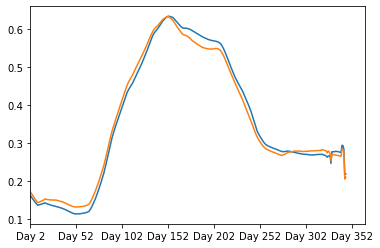

In [14]:
X_tt, X_tv, y_tt, y_tv = train_test_split(X_train[X_train.Year == 2019]. \
                                                              drop('Year', axis = 1), 
                                                  y_train[X_train.Year == 2019], 
                                                  test_size = 0.3, 
                                                  random_state = 1)

X_tt.iloc[:,3:].describe().loc['mean'].plot()
X_tv.iloc[:,3:].describe().loc['mean'].plot()

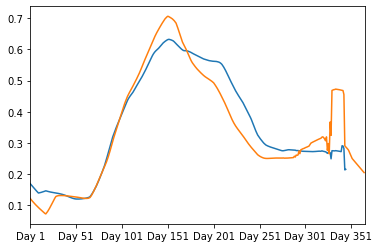

In [15]:
X_train[X_train.Year == 2019].iloc[:,3:].describe().loc['mean'].plot()
X_test.iloc[:,3:].describe().loc['mean'].plot()

In [16]:
X_train[X_train['Field ID']==142].sort_values('Year')

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
1598,2015,142,120.33,0.3680,0.3651,0.3616,0.3575,0.3529,0.3479,0.3426,...,0.4197,0.4205,0.4210,0.3669,0.3127,0.2586,0.2044,0.1503,0.0961,NaN
2261,2016,142,120.33,0.0420,0.0410,0.0400,0.0390,0.0380,0.0370,0.0360,...,0.2890,0.2879,0.2868,0.2856,0.2845,0.2834,0.2823,0.2811,0.2800,0.2789
419,2017,142,153.93,-0.0300,-0.0291,-0.0281,-0.0272,-0.0262,-0.0253,-0.0243,...,0.0005,0.0003,0.0001,0.0000,-0.0002,-0.0004,-0.0006,-0.0008,-0.0010,NaN
1451,2017,142,120.33,0.2758,0.2749,0.2741,0.2733,0.2725,0.2717,0.2710,...,0.4914,0.4814,0.4705,0.4605,0.4534,0.4510,0.4518,0.4530,0.4545,NaN
1976,2017,142,87.44,-0.0243,-0.0238,-0.0233,-0.0228,-0.0223,-0.0217,-0.0212,...,0.2509,0.2455,0.2402,0.2348,0.2295,0.2241,0.2187,0.2134,0.2080,NaN
2595,2017,142,60.52,-0.0056,-0.0055,-0.0055,-0.0054,-0.0054,-0.0053,-0.0053,...,0.2236,0.2159,0.2082,0.2005,0.1929,0.1852,0.1775,0.1698,0.1621,NaN
244,2018,142,102.75,0.4860,0.5152,0.5397,0.5570,0.5520,0.5470,0.5420,...,0.3580,0.3529,0.3478,0.3429,0.3381,0.3336,0.3295,0.3259,0.3229,NaN
680,2018,142,120.33,0.4563,0.4582,0.4603,0.4625,0.4647,0.4668,0.4687,...,0.0929,0.0976,0.1024,0.1071,0.1119,0.1166,0.1214,0.1261,0.1309,NaN
1446,2018,142,60.52,0.1544,0.1467,0.1390,0.1313,0.1236,0.1160,0.1083,...,-0.0680,-0.0685,-0.0643,-0.0625,-0.0606,-0.0588,-0.0569,-0.0551,-0.0532,NaN
476,2019,142,35.79,0.0148,0.0121,0.0092,0.0064,0.0040,0.0024,0.0020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
X_train['Field ID'].value_counts()

142     12
140     11
133     11
135     11
147      9
        ..
1872     1
1870     1
1868     1
1866     1
1891     1
Name: Field ID, Length: 1524, dtype: int64

In [18]:
X_test['Field ID'].value_counts()

199    4
135    4
157    4
137    4
136    4
      ..
864    1
863    1
862    1
861    1
1      1
Name: Field ID, Length: 874, dtype: int64

In [19]:
len(list(set(X_test['Field ID'].unique()) & set(X_train[X_train.Year == 2019]['Field ID'].unique()))) / len(X_test['Field ID'].unique())

0.04233409610983982

In [20]:
X_test['Field ID'].map(lambda x: x in \
            list(set(X_test['Field ID'].unique()) & set(X_train[X_train.Year == 2019]['Field ID'].unique()))).mean()

0.07454739084132056

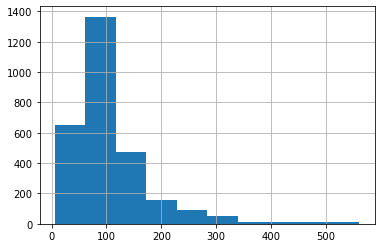

In [21]:
X_train['Field Area'].hist()

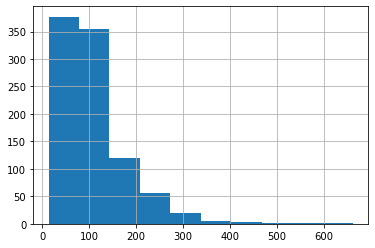

In [22]:
X_test['Field Area'].hist()

In [23]:
# Feature Engineering

In [24]:
X_train['Field Area'] = X_train['Field Area'].map(np.log)
X_test['Field Area'] = X_test['Field Area'].map(np.log)

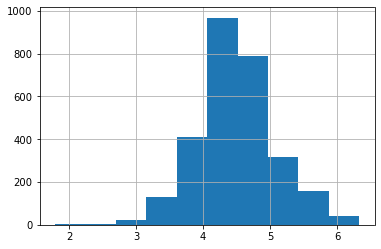

In [25]:
X_train['Field Area'].hist()

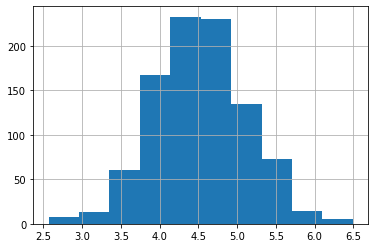

In [26]:
X_test['Field Area'].hist()

In [27]:
X_train

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2018,517,3.884446,0.5369,0.5371,0.5375,0.5379,0.5384,0.5390,0.5397,...,0.4402,0.4362,0.4322,0.4283,0.4243,0.4203,0.4163,0.4123,0.4084,NaN
1,2019,1395,4.387139,0.1159,0.1096,0.1034,0.0971,0.0909,0.0846,0.0783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,44,3.775974,-0.0204,-0.0207,-0.0210,-0.0212,-0.0215,-0.0218,-0.0220,...,0.0516,0.0833,0.1149,0.1466,0.1782,0.2099,0.2415,0.2732,0.3048,NaN
3,2018,1591,4.373742,0.4827,0.4576,0.4324,0.4073,0.3821,0.3570,0.3318,...,0.2646,0.2657,0.2668,0.2680,0.2692,0.2705,0.2717,0.2730,0.2743,NaN
4,2017,681,4.975077,-0.0202,-0.0191,-0.0181,-0.0170,-0.0160,-0.0150,-0.0140,...,-0.0351,-0.0354,-0.0358,-0.0361,-0.0365,-0.0369,-0.0372,-0.0376,-0.0379,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,2019,1631,4.762516,0.4429,0.4430,0.4430,0.4431,0.4431,0.4431,0.4431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2834,2016,336,4.257172,0.0620,0.0687,0.0755,0.0822,0.0890,0.0957,0.1025,...,-0.0090,0.0041,0.0173,0.0304,0.0436,0.0567,0.0699,0.0830,0.0962,0.1093
2835,2016,371,4.098669,0.0460,0.0399,0.0338,0.0277,0.0216,0.0154,0.0093,...,0.3603,0.3555,0.3506,0.3458,0.3409,0.3361,0.3313,0.3264,0.3216,0.3167
2836,2017,115,5.471682,-0.0148,-0.0149,-0.0150,-0.0151,-0.0153,-0.0154,-0.0155,...,0.0266,0.0362,0.0458,0.0555,0.0651,0.0747,0.0843,0.0939,0.1035,NaN


In [28]:
X_train_2015 = X_train[X_train.Year == 2015].drop('Year', axis = 1)
X_train_2016 = X_train[X_train.Year == 2016].drop('Year', axis = 1)
X_train_2017 = X_train[X_train.Year == 2017].drop('Year', axis = 1)
X_train_2018 = X_train[X_train.Year == 2018].drop('Year', axis = 1)
X_train_2019 = X_train[X_train.Year == 2019].drop('Year', axis = 1)

In [29]:
total_areas = X_train_2015[['Field ID', 'Field Area']].groupby('Field ID').sum() \
                .rename(columns = {'Field Area': 'Total Area 2015'})
total_areas = pd.concat([total_areas, X_train_2016[['Field ID', 'Field Area']].groupby('Field ID').sum()], 
                        axis = 1).rename(columns = {'Field Area': 'Total Area 2016'})
total_areas = pd.concat([total_areas, X_train_2017[['Field ID', 'Field Area']].groupby('Field ID').sum()],
                        axis = 1).rename(columns = {'Field Area': 'Total Area 2017'})
total_areas = pd.concat([total_areas, X_train_2018[['Field ID', 'Field Area']].groupby('Field ID').sum()],
                        axis = 1).rename(columns = {'Field Area': 'Total Area 2018'})
total_areas = pd.concat([total_areas, X_train_2019[['Field ID', 'Field Area']].groupby('Field ID').sum()], 
                        axis = 1).rename(columns = {'Field Area': 'Total Area 2019'})
total_areas

,Total Area 2015,Total Area 2016,Total Area 2017,Total Area 2018,Total Area 2019
Field ID,,,,,
1,5.354414,5.354414,5.354414,5.354414,NaN
2,4.316955,4.316955,4.316955,4.316955,NaN
3,NaN,3.913622,3.913622,3.913622,NaN
4,NaN,NaN,4.040592,NaN,NaN
5,NaN,NaN,4.206780,NaN,NaN
...,...,...,...,...,...
1888,NaN,NaN,NaN,NaN,4.644775
1889,NaN,NaN,NaN,NaN,4.306629
1890,NaN,NaN,NaN,NaN,4.483567


In [30]:
total_areas = total_areas.apply(lambda row: row.max(), axis = 1)
total_areas

Field ID
1       5.354414
2       4.316955
3       3.913622
4       4.040592
5       4.206780
          ...   
1888    4.644775
1889    4.306629
1890    4.483567
1891    4.660794
1892    4.231349
Length: 1524, dtype: float64

In [31]:
X_train.drop('Total Field Area', axis = 1, inplace = True, errors='ignore')
X_train.insert(2, 'Total Field Area', total_areas[X_train['Field ID']].values)
X_train

,Year,Field ID,Total Field Area,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2018,517,3.884446,3.884446,0.5369,0.5371,0.5375,0.5379,0.5384,0.5390,...,0.4402,0.4362,0.4322,0.4283,0.4243,0.4203,0.4163,0.4123,0.4084,NaN
1,2019,1395,4.387139,4.387139,0.1159,0.1096,0.1034,0.0971,0.0909,0.0846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,44,3.775974,3.775974,-0.0204,-0.0207,-0.0210,-0.0212,-0.0215,-0.0218,...,0.0516,0.0833,0.1149,0.1466,0.1782,0.2099,0.2415,0.2732,0.3048,NaN
3,2018,1591,4.373742,4.373742,0.4827,0.4576,0.4324,0.4073,0.3821,0.3570,...,0.2646,0.2657,0.2668,0.2680,0.2692,0.2705,0.2717,0.2730,0.2743,NaN
4,2017,681,4.975077,4.975077,-0.0202,-0.0191,-0.0181,-0.0170,-0.0160,-0.0150,...,-0.0351,-0.0354,-0.0358,-0.0361,-0.0365,-0.0369,-0.0372,-0.0376,-0.0379,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,2019,1631,4.762516,4.762516,0.4429,0.4430,0.4430,0.4431,0.4431,0.4431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2834,2016,336,4.257172,4.257172,0.0620,0.0687,0.0755,0.0822,0.0890,0.0957,...,-0.0090,0.0041,0.0173,0.0304,0.0436,0.0567,0.0699,0.0830,0.0962,0.1093
2835,2016,371,4.098669,4.098669,0.0460,0.0399,0.0338,0.0277,0.0216,0.0154,...,0.3603,0.3555,0.3506,0.3458,0.3409,0.3361,0.3313,0.3264,0.3216,0.3167
2836,2017,115,5.471682,5.471682,-0.0148,-0.0149,-0.0150,-0.0151,-0.0153,-0.0154,...,0.0266,0.0362,0.0458,0.0555,0.0651,0.0747,0.0843,0.0939,0.1035,NaN


In [32]:
X_train[X_train['Field Area'] != X_train['Total Field Area']]

,Year,Field ID,Total Field Area,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
24,2019,1069,4.445236,4.047428,0.2806,0.2784,0.2761,0.2739,0.2716,0.2694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2017,131,13.907467,5.131554,-0.0288,-0.0287,-0.0285,-0.0284,-0.0283,-0.0281,...,0.2545,0.2491,0.2437,0.2383,0.2329,0.2275,0.2221,0.2167,0.2114,NaN
43,2019,1240,8.331708,4.337552,0.0883,0.0763,0.0643,0.0522,0.0402,0.0281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2019,222,9.622405,4.947056,0.0580,0.0484,0.0389,0.0293,0.0198,0.0102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,2017,145,9.002344,4.239743,0.3055,0.3061,0.3066,0.3072,0.3078,0.3084,...,0.3123,0.2919,0.2693,0.2485,0.2334,0.2280,0.2297,0.2330,0.2376,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,2017,255,5.933067,4.142976,0.2970,0.2972,0.2973,0.2975,0.2976,0.2977,...,0.3733,0.3722,0.3720,0.3724,0.3731,0.3741,0.3753,0.3767,0.3783,NaN
2789,2018,263,8.722549,4.143928,0.2727,0.2719,0.2711,0.2704,0.2697,0.2689,...,0.4880,0.4877,0.4875,0.4872,0.4869,0.4865,0.4862,0.4858,0.4854,NaN
2799,2018,137,15.428969,4.348211,-0.0061,-0.0054,-0.0047,-0.0040,-0.0032,-0.0025,...,0.4225,0.4142,0.4059,0.3976,0.3893,0.3811,0.3728,0.3645,0.3562,NaN
2816,2016,675,9.133689,4.536249,-0.0178,-0.0176,-0.0176,-0.0175,-0.0175,-0.0175,...,-0.0250,-0.0290,-0.0317,-0.0333,-0.0340,-0.0337,-0.0328,-0.0312,-0.0292,-0.0269


In [33]:
X_test.drop('Total Field Area', axis = 1, inplace = True, errors='ignore')
X_test.insert(2, 'Total Field Area',
              X_test['Field ID']. \
                  map(lambda a: total_areas[a] if a in total_areas else np.nan).values)
X_test

,Year,Field ID,Total Field Area,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2019,605,NaN,4.887337,-0.0047,-0.0051,-0.0056,-0.0061,-0.0067,-0.0073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,305,4.118061,4.118061,0.2445,0.2438,0.2431,0.2424,0.2417,0.2410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1096,NaN,4.081935,0.0145,0.0081,0.0018,-0.0046,-0.0110,-0.0122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,179,4.721708,4.721708,-0.0171,-0.0200,-0.0209,-0.0216,-0.0221,-0.0223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,282,4.227855,4.227855,0.3908,0.3892,0.3876,0.3859,0.3843,0.3827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2019,665,3.839452,3.839452,-0.0176,-0.0179,-0.0181,-0.0184,-0.0186,-0.0188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,2019,1277,NaN,5.434769,0.0212,0.0181,0.0149,0.0118,0.0087,0.0056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,2019,875,5.117814,5.117814,0.0460,0.0411,0.0362,0.0312,0.0263,0.0214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,2019,301,4.816403,4.816403,0.2499,0.2483,0.2468,0.2452,0.2437,0.2422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
X_test['Total Field Area'].isnull().mean()

0.3929712460063898

In [35]:
X_test[(X_test['Field Area'] != X_test['Total Field Area']) & X_test['Total Field Area'].notnull()]

,Year,Field ID,Total Field Area,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
7,2019,149,11.166398,6.016523,0.1139,0.1108,0.1077,0.1046,0.1015,0.0984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2019,133,21.263446,4.127134,-0.0185,-0.0188,-0.0190,-0.0192,-0.0194,-0.0196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2019,136,10.515119,3.799750,0.1122,0.1072,0.1023,0.0974,0.0926,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2019,137,15.428969,3.807329,0.1011,0.0965,0.0919,0.0872,0.0826,0.0779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2019,157,10.382042,4.061821,0.1078,0.1032,0.0987,0.0942,0.0898,0.0854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2019,135,24.051701,4.362844,0.2713,0.2672,0.2631,0.2591,0.2551,0.2512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
908,2019,247,8.206703,3.425565,0.0580,0.0700,0.0820,0.0940,0.1060,0.1180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914,2019,143,10.942926,4.370586,0.2389,0.2320,0.2251,0.2182,0.2113,0.2045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916,2019,675,9.133689,4.597440,-0.0097,-0.0100,-0.0103,-0.0106,-0.0108,-0.0110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
X_train.drop('Rel', axis = 1, inplace = True, errors='ignore')
X_train.insert(2, 'Rel', X_train['Field Area'] / X_train['Total Field Area'])
X_train

,Year,Field ID,Rel,Total Field Area,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2018,517,1.0,3.884446,3.884446,0.5369,0.5371,0.5375,0.5379,0.5384,...,0.4402,0.4362,0.4322,0.4283,0.4243,0.4203,0.4163,0.4123,0.4084,NaN
1,2019,1395,1.0,4.387139,4.387139,0.1159,0.1096,0.1034,0.0971,0.0909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,44,1.0,3.775974,3.775974,-0.0204,-0.0207,-0.0210,-0.0212,-0.0215,...,0.0516,0.0833,0.1149,0.1466,0.1782,0.2099,0.2415,0.2732,0.3048,NaN
3,2018,1591,1.0,4.373742,4.373742,0.4827,0.4576,0.4324,0.4073,0.3821,...,0.2646,0.2657,0.2668,0.2680,0.2692,0.2705,0.2717,0.2730,0.2743,NaN
4,2017,681,1.0,4.975077,4.975077,-0.0202,-0.0191,-0.0181,-0.0170,-0.0160,...,-0.0351,-0.0354,-0.0358,-0.0361,-0.0365,-0.0369,-0.0372,-0.0376,-0.0379,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,2019,1631,1.0,4.762516,4.762516,0.4429,0.4430,0.4430,0.4431,0.4431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2834,2016,336,1.0,4.257172,4.257172,0.0620,0.0687,0.0755,0.0822,0.0890,...,-0.0090,0.0041,0.0173,0.0304,0.0436,0.0567,0.0699,0.0830,0.0962,0.1093
2835,2016,371,1.0,4.098669,4.098669,0.0460,0.0399,0.0338,0.0277,0.0216,...,0.3603,0.3555,0.3506,0.3458,0.3409,0.3361,0.3313,0.3264,0.3216,0.3167
2836,2017,115,1.0,5.471682,5.471682,-0.0148,-0.0149,-0.0150,-0.0151,-0.0153,...,0.0266,0.0362,0.0458,0.0555,0.0651,0.0747,0.0843,0.0939,0.1035,NaN


In [37]:
X_test.drop('Rel', axis = 1, inplace = True, errors='ignore')
X_test.insert(2, 'Rel', X_test['Field Area'] / X_test['Total Field Area'])
X_test

,Year,Field ID,Rel,Total Field Area,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2019,605,NaN,NaN,4.887337,-0.0047,-0.0051,-0.0056,-0.0061,-0.0067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,305,1.0,4.118061,4.118061,0.2445,0.2438,0.2431,0.2424,0.2417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1096,NaN,NaN,4.081935,0.0145,0.0081,0.0018,-0.0046,-0.0110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,179,1.0,4.721708,4.721708,-0.0171,-0.0200,-0.0209,-0.0216,-0.0221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,282,1.0,4.227855,4.227855,0.3908,0.3892,0.3876,0.3859,0.3843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2019,665,1.0,3.839452,3.839452,-0.0176,-0.0179,-0.0181,-0.0184,-0.0186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,2019,1277,NaN,NaN,5.434769,0.0212,0.0181,0.0149,0.0118,0.0087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,2019,875,1.0,5.117814,5.117814,0.0460,0.0411,0.0362,0.0312,0.0263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,2019,301,1.0,4.816403,4.816403,0.2499,0.2483,0.2468,0.2452,0.2437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Imputing Strategies

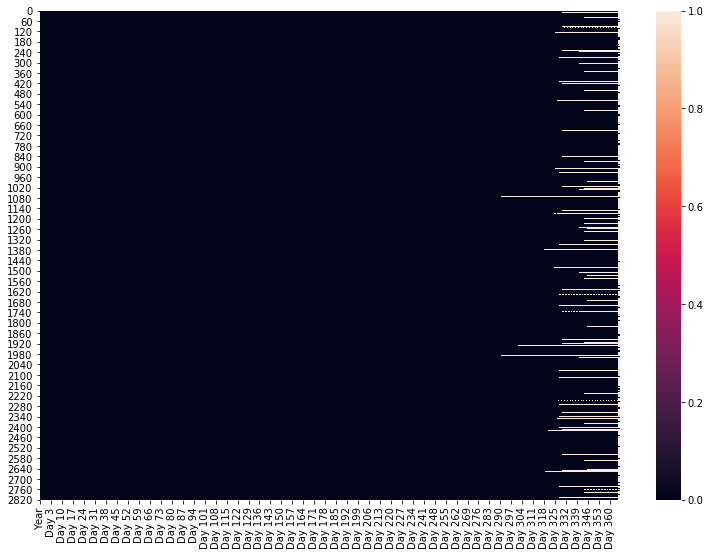

In [39]:
sns.heatmap(X_train.isnull(), ax = plt.subplots(figsize=(13, 9))[1])

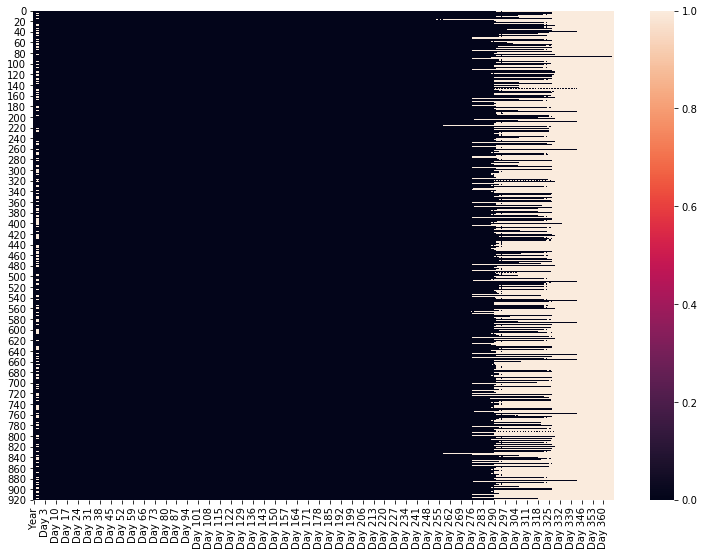

In [40]:
sns.heatmap(X_test.isnull(), ax = plt.subplots(figsize=(13, 9))[1])

In [41]:
def KNN_imputer(X_train, X_test):
    imputer = KNNImputer(n_neighbors = 9, weights = "distance")
    iX_train = imputer.fit_transform(X_train)
    iX_test = imputer.transform(X_test)
    return iX_train, iX_test

In [42]:
def custom_imputer(X_train, X_test):
    imputer = KNNImputer(
                n_neighbors = 6,
                weights = 'uniform',
                metric = 'nan_euclidean',
                add_indicator = False,
            )
    iX_train = imputer.fit_transform(X_train)
    iX_test = imputer.transform(X_test)
    return iX_train, iX_test

In [43]:
def custom_imputer_2(X_train, X_test):
    imputer = KNNImputer(
                n_neighbors = 6,
                weights = 'distance',
                metric = 'nan_euclidean',
                add_indicator = True,
            )
    iX_train = imputer.fit_transform(X_train)
    iX_test = imputer.transform(X_test)
    return iX_train, iX_test

In [44]:
# Testing and evaluating

In [45]:
RFC_default = RandomForestClassifier(n_estimators = 100, 
                             criterion = 'gini', 
                             max_depth = None, 
                             min_samples_split = 2,
                             min_samples_leaf = 1,
                             min_weight_fraction_leaf = 0.0,
                             max_features = 'auto',
                             max_leaf_nodes = None,
                             min_impurity_decrease = 0.0,
                             min_impurity_split = None,
                             bootstrap = True,
                             oob_score = False,
                             n_jobs = -1,
                             random_state = 0, 
                             verbose = 0, 
                             warm_start = False,
                             class_weight = None,
                             ccp_alpha = 0.0,
                             max_samples = None)

In [46]:
def whole_method(model, imputer, X_train, y_train, X_test, nsteps = 3):
    scores = np.zeros(nsteps)
    
    for i in range(nsteps):
    
        X_tt, X_tv, y_tt, y_tv = train_test_split(X_train[X_train.Year == 2019]. \
                                                              drop('Year', axis = 1), 
                                                  y_train[X_train.Year == 2019], 
                                                  test_size = 0.2, 
                                                  random_state = i)

        X_tv = pd.concat([X_tv.iloc[:, :300],
                          X_tv.iloc[:, 300:].apply(lambda a: [np.nan] * len(a))],
                          axis = 1)
        
        tfa = X_tv['Total Field Area'].copy()
        tfa[:int(len(tfa) // 2)] = [np.nan] * int(len(tfa) // 2)
        X_tv['Total Field Area'] = tfa
        
        rel = X_tv['Rel'].copy()
        rel[:int(len(rel) // 2)] = [np.nan] * int(len(rel) // 2)
        X_tv['Rel'] = rel
        
        X_tv.insert(2, 'Total Field Area Indicator', X_tv['Total Field Area'].isnull())
        X_tt.insert(2, 'Total Field Area Indicator', X_tt['Total Field Area'].isnull())
        
        X_tt, X_tv = imputer(X_tt, X_tv)
        
#         return X_tv

        model.fit(X_tt, y_tt)
        scores[i] = f1_score(y_tv, model.predict(X_tv), average='weighted')
        
    print('Mean:', scores.mean())
    print('Std:', scores.std())

In [47]:
X_train

,Year,Field ID,Rel,Total Field Area,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2018,517,1.0,3.884446,3.884446,0.5369,0.5371,0.5375,0.5379,0.5384,...,0.4402,0.4362,0.4322,0.4283,0.4243,0.4203,0.4163,0.4123,0.4084,NaN
1,2019,1395,1.0,4.387139,4.387139,0.1159,0.1096,0.1034,0.0971,0.0909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,44,1.0,3.775974,3.775974,-0.0204,-0.0207,-0.0210,-0.0212,-0.0215,...,0.0516,0.0833,0.1149,0.1466,0.1782,0.2099,0.2415,0.2732,0.3048,NaN
3,2018,1591,1.0,4.373742,4.373742,0.4827,0.4576,0.4324,0.4073,0.3821,...,0.2646,0.2657,0.2668,0.2680,0.2692,0.2705,0.2717,0.2730,0.2743,NaN
4,2017,681,1.0,4.975077,4.975077,-0.0202,-0.0191,-0.0181,-0.0170,-0.0160,...,-0.0351,-0.0354,-0.0358,-0.0361,-0.0365,-0.0369,-0.0372,-0.0376,-0.0379,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,2019,1631,1.0,4.762516,4.762516,0.4429,0.4430,0.4430,0.4431,0.4431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2834,2016,336,1.0,4.257172,4.257172,0.0620,0.0687,0.0755,0.0822,0.0890,...,-0.0090,0.0041,0.0173,0.0304,0.0436,0.0567,0.0699,0.0830,0.0962,0.1093
2835,2016,371,1.0,4.098669,4.098669,0.0460,0.0399,0.0338,0.0277,0.0216,...,0.3603,0.3555,0.3506,0.3458,0.3409,0.3361,0.3313,0.3264,0.3216,0.3167
2836,2017,115,1.0,5.471682,5.471682,-0.0148,-0.0149,-0.0150,-0.0151,-0.0153,...,0.0266,0.0362,0.0458,0.0555,0.0651,0.0747,0.0843,0.0939,0.1035,NaN


In [48]:
# whole_method(RFC_default, KNN_imputer, X_train, y_train, X_test, nsteps = 50)

In [49]:
# whole_method(RFC_default, custom_imputer, X_train, y_train, X_test, nsteps = 50)

In [50]:
# whole_method(RFC_default, custom_imputer_2, X_train, y_train, X_test, nsteps = 50)

In [51]:
# Predictings

In [52]:
X_test

,Year,Field ID,Rel,Total Field Area,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,...,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366
0,2019,605,NaN,NaN,4.887337,-0.0047,-0.0051,-0.0056,-0.0061,-0.0067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,305,1.0,4.118061,4.118061,0.2445,0.2438,0.2431,0.2424,0.2417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1096,NaN,NaN,4.081935,0.0145,0.0081,0.0018,-0.0046,-0.0110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,179,1.0,4.721708,4.721708,-0.0171,-0.0200,-0.0209,-0.0216,-0.0221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,282,1.0,4.227855,4.227855,0.3908,0.3892,0.3876,0.3859,0.3843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2019,665,1.0,3.839452,3.839452,-0.0176,-0.0179,-0.0181,-0.0184,-0.0186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,2019,1277,NaN,NaN,5.434769,0.0212,0.0181,0.0149,0.0118,0.0087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,2019,875,1.0,5.117814,5.117814,0.0460,0.0411,0.0362,0.0312,0.0263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,2019,301,1.0,4.816403,4.816403,0.2499,0.2483,0.2468,0.2452,0.2437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
def predict(model, imputer, X_train, y_train, X_test): 
    
    X_tt = X_train.drop('Year', axis = 1)
    
    X_tv = X_test.drop('Year', axis = 1)
    
    y_tt = y_train
    
    X_tt, X_tv = imputer(X_tt, X_tv)

    model.fit(X_tt, y_tt)
    
    return model.predict(X_tv)

In [57]:
preds = predict(RFC_default, custom_imputer_2, X_train, y_train, X_test)
preds

array([ 4, 12, 10,  3,  4,  4, 10,  8,  7, 13,  4,  3,  4,  9,  9,  9,  4,
        3,  8, 28, 13,  3, 17, 16,  4, 13, 13,  4, 13,  4, 13, 20,  9, 17,
       10, 10,  4,  7, 16,  8, 14,  3, 21,  4, 16, 13,  4,  4,  4, 13,  4,
       13,  8,  8,  3, 21,  4, 16,  3, 13, 21,  7,  7,  7,  8, 10,  8, 10,
       13,  7,  4, 13,  8,  4,  4,  4,  4,  9, 16,  4,  8,  3,  4,  4,  4,
        4,  8,  4, 13, 13, 13,  4, 13,  3,  4,  4,  4,  9,  7,  4,  4,  4,
        4, 10,  8,  4, 13, 13,  9, 13, 13, 10, 13, 10,  9, 13,  4, 10, 13,
       13,  4,  4,  3,  4,  9,  4, 16, 12, 11, 10,  4,  7, 13,  4,  4,  9,
        4,  9,  4, 14,  4, 21, 16,  8, 13, 10,  4, 14,  4, 13, 13,  4,  8,
        9, 13, 10, 12, 13,  8,  4, 13, 21, 13,  4,  4,  5,  9, 13,  4, 12,
        9, 10,  7, 13, 13,  4, 21, 13, 13,  8,  3,  4,  6,  9, 13, 13,  9,
        4,  4,  4,  4, 15, 13,  3,  8,  7, 10, 13, 21,  8,  7,  4,  9, 14,
        7,  4,  4,  4,  4, 13, 14,  4,  4, 13,  4, 13, 10, 17,  4,  9,  4,
       13,  4,  5, 10, 13

In [58]:
pd.Series(preds).to_csv('predictions.csv', index=False, header=['Culture'])